[4, 4] [5, 5] [3, 5]
[-1.         -0.33333333]
[4, 4] [3, 5] [2. 4.]
[-1.          0.33333333]
[3, 5] [2. 4.] [2.5 4.5]
[-0.5 -0.5]
[2. 4.] [2.5 4.5] [1.5 3.5]
[-0.5 -0.5]
[2. 4.] [1.5 3.5] [1.75 3.75]
[0.25 0.25]
[2. 4.] [1.75 3.75] [2.25 4.25]
[-0.25 -0.25]
[2. 4.] [1.75 3.75] [0.75 2.75]
[0.75 0.75]
Optimum found!
Program done running.
Runtime: 0.0053 seconds
Minimum = 2.031


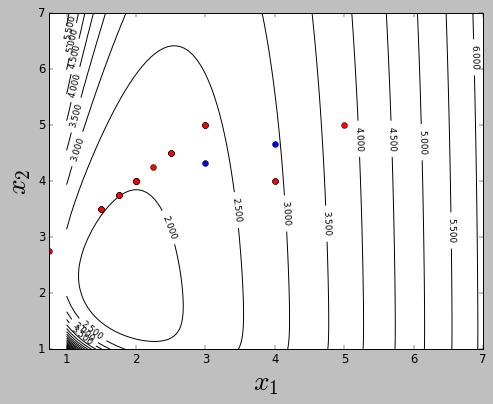

In [4]:
# Starting points
x1o = [4,4]
x2o = [5,5]
x3o = [3,5]
l = 1.5
a = 2
e = 0.01
#Calculate objective function of starting points
y1o = FaE(x1o[0],x1o[1])
y2o = FaE(x2o[0],x2o[1])
y3o = FaE(x3o[0],x3o[1])
optimumNotFound = True # Condition for while loop
c1data = [] # Data storage for centroids
c2data = [] # Data storage
v1data = [] # Data storage for vertices
v2data = [] # Data storage for vertices
start = timeit.default_timer() # Start runtimer
i = 1
while optimumNotFound: 
    co = [(x1o[0]+x2o[0]+x3o[0])/3, (x1o[1]+x2o[1]+x3o[1])/3] #Centroid 
    c1data = np.append(c1data,co[0])
    c2data = np.append(c2data,co[1])
    print(x1o, x2o, x3o)
    v1data = np.append(v1data,[x1o[0],x2o[0],x3o[0]])
    v2data = np.append(v2data,[x1o[1],x2o[1],x3o[1]])
    if (y1o > y2o) & (y1o > y3o): #x1 is worst
        u = np.subtract(co, x1o)
        print(u)
        x1n = x2o #Calculate new points
        x2n = x3o
        x3n = x1o + (l*u)
        #Calculate objective function of new points 
        y1n = FaE(x1n[0],x1n[1])
        y2n = FaE(x2n[0],x2n[1])
        y3n = FaE(x3n[0],x3n[1])
        if y3n < y1o: #If new point is better
            l = l*a
        else:
            l = l/a
        x3n = x1o + (l*u)
        y3n = FaE(x3n[0],x3n[1])
            
    elif (y2o > y1o) & (y2o > y3o): #x2 is worst
        u = np.subtract(co, x2o)
        print(u)
        x1n = x1o #Calculate new points
        x2n = x3o
        x3n = x2o + (l*u) 
        #Calculate objective function of new points 
        y1n = FaE(x1n[0],x1n[1])
        y2n = FaE(x2n[0],x2n[1])
        y3n = FaE(x3n[0],x3n[1])
        if y3n < y2o: #If new point is better
            l = l*a
        else:
            l = l/a
        x3n = x2o + (l*u)
        y3n = FaE(x3n[0],x3n[1])
        
    elif (y3o > y1o) & (y3o > y2o): #x3 is worst
        u = np.subtract(co, x3o)
        print(u)
        x1n = x1o #Calculate new points
        x2n = x2o
        x3n = x3o + (l*u)
        #Calculate objective function of new points 
        y1n = FaE(x1n[0],x1n[1])
        y2n = FaE(x2n[0],x2n[1])
        y3n = FaE(x3n[0],x3n[1])
        if y3n < y3o: #If new point is better
            l = l*a
        else:
            l = l/a
        x3n = x3o + (l*u)
        y3n = FaE(x3n[0],x3n[1])
        
    
    #Calculate weighted of average of difference
    diff = ((((y1n-y1o)**2) + ((y2n-y2o)**2) + ((y3n-y3o)**2))/3)**(1/2)
#     if diff < e:
    if i == 7:
        optimumNotFound = False
        print("Optimum found!")
        print("Program done running.")
        stop = timeit.default_timer() # Stop runtimer
        print("Runtime: " + str(round(stop - start,4)) + " seconds") 
        print("Minimum = " + str(round(FaE(co[0],co[1]),3)))
    else:
        y1o = y1n
        y2o = y2n
        y3o = y3n
        x1o = x1n
        x2o = x2n
        x3o = x3n
    i = i + 1
    
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y, 20,
                    colors='k',  # negative contours will be dashed by default
                        )
ax.clabel(CS, fontsize=9, inline=1) # Contour labels
ax.set_xlabel('$x_1$', fontsize=28) 
ax.set_ylabel('$x_2$', fontsize=28) 
ax.plot(c1data, c2data, 'o')
ax.plot(v1data, v2data, 'ro')
plt.show()     

    